In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load HR-Employee-Attrition.csv dataset and create an ensemble ML model for predicting target variable (Attrition).
df = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=99, stratify=y)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params_rf = {'n_estimators': [8, 9, 10, 11, 12]}

In [7]:
param_grid = {
    'n_estimators': [8, 9, 10, 11, 12],
    'max_features': [2, 4, 6]
}

In [8]:
from sklearn.model_selection import GridSearchCV

rf_gs = GridSearchCV(rf, cv=5, param_grid = param_grid)

In [9]:
rf_gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6],
                         'n_estimators': [8, 9, 10, 11, 12]})

In [10]:
#Report the performance of the model using appropriate metrics.

In [11]:
from matplotlib import pyplot as plt

def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    _, ax = plt.subplots(1,1)

    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

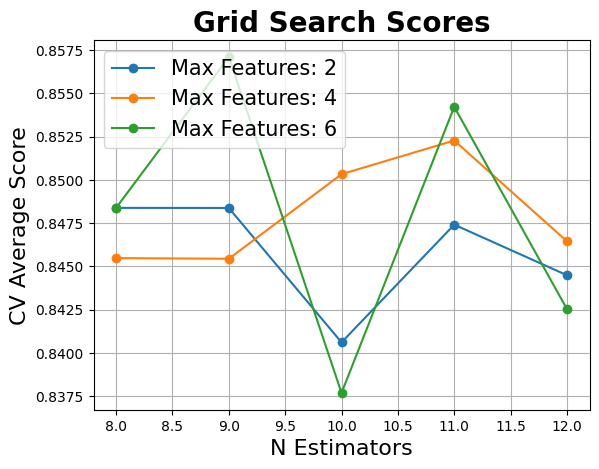

In [12]:
plot_grid_search(rf_gs.cv_results_, [8, 9, 10, 11, 12], [2, 4, 6], 'N Estimators', 'Max Features')

In [13]:
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'max_features': 6, 'n_estimators': 9}
